# Utility functions and global parameters

In [2]:
import math
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import random

# number of intervals between points
N=10

#number of point evaluations
n = N+1

#integration domain borders
A = -1
B = 1

# runge function 1/(1+x^2)
def f_runge(x):
    return 1.0/(1.0+25.0*x*x)

# slightly different function with f(x)=1/(1+|x|) (easier to integrate analytically)
def f(x):
    return 1.0/(1.0+abs(x))

# calculates n uniformly distributed support points for function f -> returns x and y vector 
def get_support_points_uniform(A,B,n,f):
    x_vec_uniform = np.linspace(A,B,n)
    y_vec_uniform = np.array([f(x) for x in x_vec_uniform])
    return x_vec_uniform, y_vec_uniform

# calculates n chebyshev distributed support points for function f -> returns x and y vector 
def get_support_points_cheb(A,B,n,f):
    x_vec_cheb = np.array([math.cos(math.pi * (i)*1.0 / ((n-1)*1.0)) for i in range(n)])
    y_vec_cheb = np.array([f(x) for x in x_vec_cheb])
    return x_vec_cheb, y_vec_cheb

# constructs Van der Monde matrix and solves the interpolation problem -> returns the coefficients c_i of polynomial
# i.e. p(x)= \sum_i=0^(n-1) c_i x^i 
def solve_Van_der_Monde(x_vec,y_vec):
    b = y_vec
    n = len(x_vec)
    A = np.ones((n,n))
    A[:,1]=x_vec
    for j in range(2,n):
        A[:,j] = A[:,j-1]*x_vec
    polynomial_coefficients = np.linalg.solve(np.array(A),np.array(b))
    return polynomial_coefficients

# evaluates te polynomial defined by the polynomial coefficients at the given x points -> returns function values y
def eval_polynomial(polynomial_coefficients,x_vec):
    n = len(polynomial_coefficients)
    m = len(x_vec)
    A = np.ones((m,n))
    A[:,1]=x_vec
    for j in range(2,n):
        A[:,j] = A[:,j-1]*x_vec
    return np.inner(A,polynomial_coefficients)

# Runge function

In this example we will demonstrate the Runge effect for the classic runge function

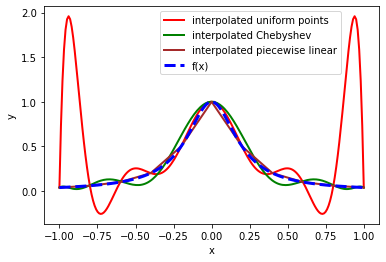

In [3]:
# This is a python script visualizing the runge effect using uniform distributed interpolation points.
# It also shows a possible solution to this problem: using a chebyshev distribution for the points.
# You can modify N to increase the number of interpolation points (N+1).
# The interpolating polynomial is then evaluated at m uniform points.

# get support points
x_vec_uniform, y_vec_uniform = get_support_points_uniform(A,B,n,f_runge) 
x_vec_cheb, y_vec_cheb = get_support_points_cheb(A,B,n,f_runge) 

# calculating polynomial coefficients
c_uniform = solve_Van_der_Monde(x_vec_uniform, y_vec_uniform)
c_cheb = solve_Van_der_Monde(x_vec_cheb, y_vec_cheb)

# evaluate polynomials for plotting at uniform points
m = 200
x_vec_eval, y_eval_exact = get_support_points_uniform(A,B,m,f_runge)
y_eval_uniform = eval_polynomial(c_uniform, x_vec_eval)
y_eval_cheb = eval_polynomial(c_cheb, x_vec_eval)

# create plot
fig = plt.figure()
plt.plot(x_vec_eval,y_eval_uniform,color='red',lw=2,ls='-',label='interpolated uniform points')
plt.plot(x_vec_eval,y_eval_cheb,color='green',lw=2,ls='-',label='interpolated Chebyshev')
plt.plot(x_vec_uniform,y_vec_uniform,color='brown',lw=2,ls='-',label='interpolated piecewise linear')
plt.plot(x_vec_eval,y_eval_exact,color='blue',lw=3,ls='--',label='f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(0.9, 1))

#plt.savefig('runge_solution.pdf')

plt.show()




# Alternative function

This exercise demonstrates that the Runge effect does not just appear for the Runge function but also for other functions that are not polynomials.

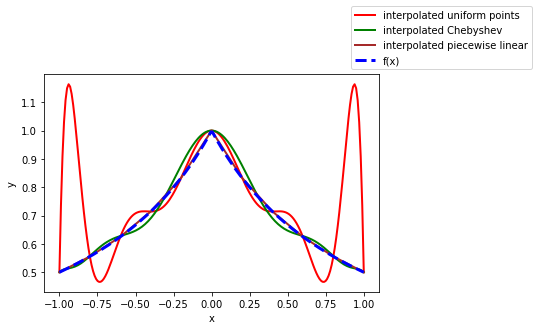

Integral with uniform points: 1.5224424077213055
Integral with chebyshev points: 1.4026332857418506
Exact integral: 1.4026332857418506


In [4]:
# This is a python script visualizing the runge effect using uniform distributed interpolation 
# points for the alternative function.
# It also shows a possible solution to this problem: using a chebyshev distribution for the points.
# You can modify N to increase the number of interpolation points (N+1).
# The interpolating polynomial is then evaluated at m uniform points.

# get support points
x_vec_uniform, y_vec_uniform = get_support_points_uniform(A,B,n,f) 
x_vec_cheb, y_vec_cheb = get_support_points_cheb(A,B,n,f) 

# calculating polynomial coefficients
c_uniform = solve_Van_der_Monde(x_vec_uniform, y_vec_uniform)
c_cheb = solve_Van_der_Monde(x_vec_cheb, y_vec_cheb)

# evaluate polynomials for plotting at uniform points
m = 200
x_vec_eval, y_eval_exact = get_support_points_uniform(A,B,m,f)
y_eval_uniform = eval_polynomial(c_uniform, x_vec_eval)
y_eval_cheb = eval_polynomial(c_cheb, x_vec_eval)

# create plot
fig = plt.figure()
plt.plot(x_vec_eval,y_eval_uniform,color='red',lw=2,ls='-',label='interpolated uniform points')
plt.plot(x_vec_eval,y_eval_cheb,color='green',lw=2,ls='-',label='interpolated Chebyshev')
plt.plot(x_vec_uniform,y_vec_uniform,color='brown',lw=2,ls='-',label='interpolated piecewise linear')
plt.plot(x_vec_eval,y_eval_exact,color='blue',lw=3,ls='--',label='f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(0.9, 1))

#plt.savefig('runge_solution.pdf')

plt.show()

# calculating integrals via the interpolated polynomials
def calculate_integral(polynomial_coefficients, A, B):
    integral = 0.0
    for i, coefficient in enumerate(polynomial_coefficients):
        # integrating monomial i (x^i) with coefficient
        integral += coefficient*(B**(i+1) - (A)**(i+1))/(i+1)
    return integral

integral_uniform = calculate_integral(c_uniform, A, B)
integral_cheb = calculate_integral(c_cheb, A, B)
   
exact_integral = 1.386294361119890618834464242
print("Integral with uniform points:", integral_uniform)
print("Integral with chebyshev points:", integral_cheb)
print("Exact integral:", integral_cheb)

# Condition of Polynomial Interpolation

This exercise demonstrates the bad conditioning of the polynomial interpolation with equidistant grids and how to improve on this by using Chebyshev points. The absolut value of the Lagrange polynomials associated with the grid points define the condition number of the problem at the specific points. One can see that with Chebysev points the absolut value of the Lagrange polynomials is bounded by around 1. Hence, the problem is well-conditioned for Chebysev points. 

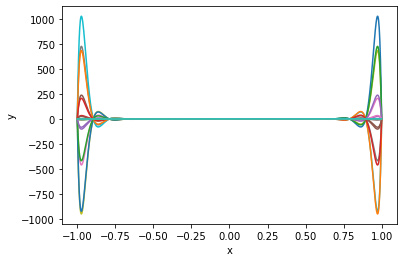

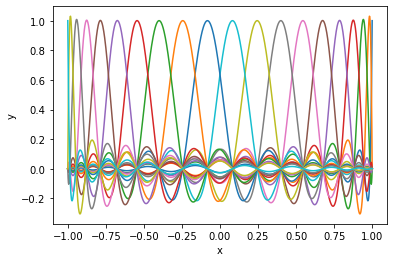

In [5]:
A = -1 
B = 1
n = 20
x_vec_uniform, y_vec_uniform = get_support_points_uniform(A,B,n,f)
x_vec_cheb, y_vec_cheb = get_support_points_cheb(A,B,n,f)

def lagrange_polynomial(x_vec, x_eval, i):
    result = np.ones(len(x_eval))
    for j in range(len(x_vec)):
        if i!=j:
            result *= (x_eval - x_vec[j]) / (x_vec[i] - x_vec[j])
    return result
                

def plot_lagrange_polynomials(x_vec):
    x_eval = np.linspace(A,B,1000)
    fig = plt.figure()
    for i in range(len(x_vec)):
        plt.plot(x_eval, lagrange_polynomial(x_vec, x_eval, i))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
plot_lagrange_polynomials(x_vec_uniform)
plot_lagrange_polynomials(x_vec_cheb)

# Demonstrate conditioning of Vandermonde matrix

Here we demonstrate that the Vandermonde matrix get increasingly ill-conditioned as the monomials $x^i$ get closer and closer in the intervall $[0,1]$. Hence, the columns of the Vandermonde matrix get more and more similar to each other for larger values of $i$. This generates an ill-conditioned problem as the conditioning of a matrix gets worse if the columns/rows move closer to a linear dependence.

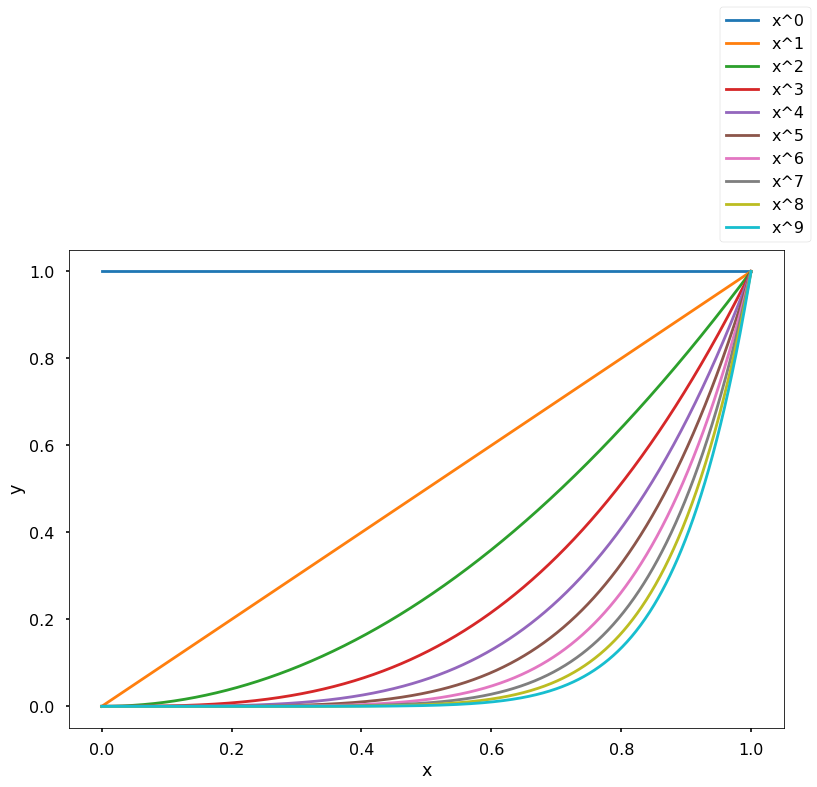

The condition number of the matrix is 15193229.67628169


In [25]:
import math
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_polynomials(N=10):
    x_vals = np.linspace(0,1,N*100)

    for n in range(N):
        y_vals = x_vals ** n
        plt.plot(x_vals,y_vals,label="x^"+str(n))
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.legend()
    plt.legend(bbox_to_anchor=(0.9, 1))

    plt.savefig('runge_solution.pdf')

    plt.show()
plot_polynomials()

def print_vandermonde_cond(N=10):
    x_vals = np.linspace(0,1,N)
    A = np.zeros((N,N))
    for n in range(N):
        A[:,n] = x_vals ** n
    print("The condition number of the matrix is", np.linalg.cond(A))
print_vandermonde_cond()

# Examples for linear least squares

Here we show to datasets that follow a linear or quadratic trend. Both of the datasets contain errors so that they do not exactly follow this trend. Using linear least squares with the appropriate ansatz function, we can recover the original trend as good a

In [26]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 50})
plt.rc('font', size=10)          # controls default text sizes

plt.style.use('seaborn-poster')

In [27]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x+ x * np.random.random(len(x))

In [28]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [29]:
# direct least square regression
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)


[[1.47524928]
 [1.00454316]]


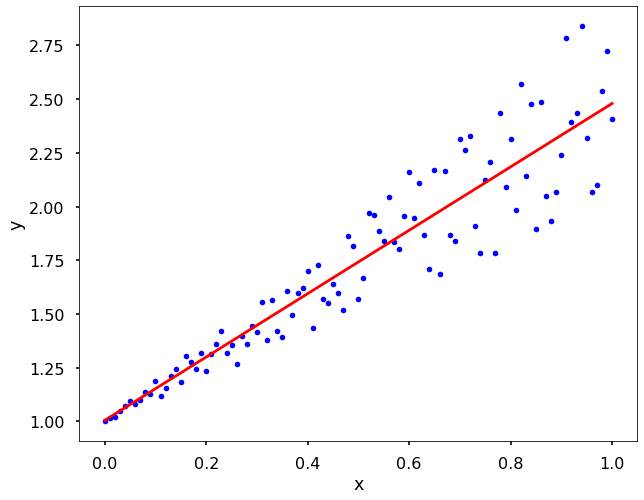

In [30]:


# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("linear_regression.pdf", bbox_inches='tight')
plt.show()

In [31]:
# generate x and y
x2 = np.linspace(0, 1, 101)
y2 = x2*x2 + x2*x2 * np.random.random(len(x2))

In [32]:
# assemble matrix A
A = np.vstack([x2*x2, x2, np.ones(len(x2))]).T

# turn y into a column vector
y2 = y2[:, np.newaxis]

In [33]:
# direct least square regression
alpha2 = np.linalg.lstsq(A, y2, rcond=None)[0]
print(alpha2)

[[ 1.81694194]
 [-0.28444728]
 [ 0.04217893]]


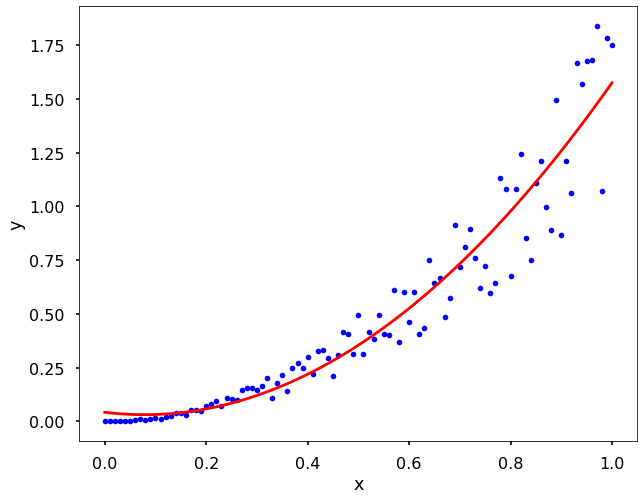

In [34]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x2, y2, 'b.')
plt.plot(x2, alpha2[0] * x2 *x2 +  alpha2[1]*x2 + alpha2[2], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("quadratic_regression.pdf", bbox_inches='tight')
plt.show()